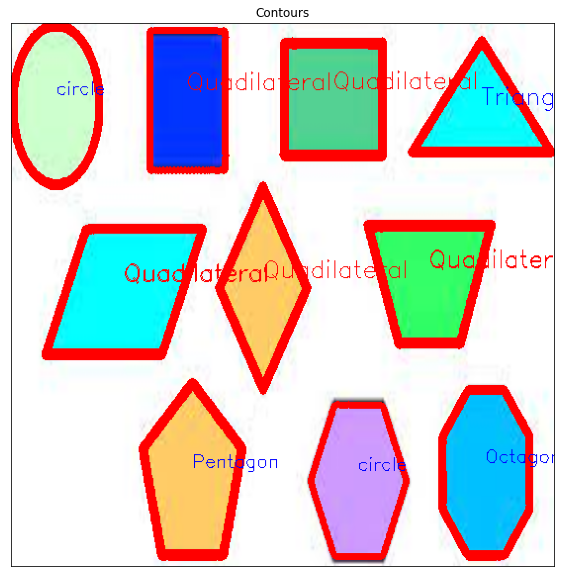

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 10))
img = cv2.imread('images.jpg')
 
img = cv2.resize(img,(550,550))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
_,threshold = cv2.threshold(gray, 147, 240, cv2.THRESH_BINARY_INV)
contours,_ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
 
i = 0
for contour in contours:
    if i == 0:
        i = 1
        continue
 
    approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
 
    cv2.drawContours(img, [contour], 0, (255, 0, 0), 5)
 
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])-10
    if len(approx) == 3:
        cv2.putText(img, 'Triangle', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 1)
    elif len(approx) == 4:
        cv2.putText(img, 'Quadilateral', (x, y),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0,0), 1)
    elif len(approx) == 5:
        cv2.putText(img, 'Pentagon', (x, y),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 1)
    elif len(approx) == 6:
        cv2.putText(img, 'Hexagon', (x, y),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 1)
    elif len(approx) == 8:
        cv2.putText(img, 'Octagon', (x, y),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 1)
    else:
        cv2.putText(img, 'circle', (x, y),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0, 255), 1)
 
 
plt.subplot(1,1,1)
plt.imshow(img)
plt.title("Shape Analysis")
plt.xticks([]),plt.yticks([])
plt.show()

In [13]:
help(cv2.putText)

Help on built-in function putText:

putText(...)
    putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]]) -> img
    .   @brief Draws a text string.
    .   
    .   The function cv::putText renders the specified text string in the image. Symbols that cannot be rendered
    .   using the specified font are replaced by question marks. See #getTextSize for a text rendering code
    .   example.
    .   
    .   @param img Image.
    .   @param text Text string to be drawn.
    .   @param org Bottom-left corner of the text string in the image.
    .   @param fontFace Font type, see #HersheyFonts.
    .   @param fontScale Font scale factor that is multiplied by the font-specific base size.
    .   @param color Text color.
    .   @param thickness Thickness of the lines used to draw a text.
    .   @param lineType Line type. See #LineTypes
    .   @param bottomLeftOrigin When true, the image data origin is at the bottom-left corner. Otherwise,
   

In [20]:
help(cv2.threshold)

Help on built-in function threshold:

threshold(...)
    threshold(src, thresh, maxval, type[, dst]) -> retval, dst
    .   @brief Applies a fixed-level threshold to each array element.
    .   
    .   The function applies fixed-level thresholding to a multiple-channel array. The function is typically
    .   used to get a bi-level (binary) image out of a grayscale image ( #compare could be also used for
    .   this purpose) or for removing a noise, that is, filtering out pixels with too small or too large
    .   values. There are several types of thresholding supported by the function. They are determined by
    .   type parameter.
    .   
    .   Also, the special values #THRESH_OTSU or #THRESH_TRIANGLE may be combined with one of the
    .   above values. In these cases, the function determines the optimal threshold value using the Otsu's
    .   or Triangle algorithm and uses it instead of the specified thresh.
    .   
    .   @note Currently, the Otsu's and Triangle methods a